In [1]:
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
census_dataset = pd.read_csv('../datasets/2011-census-microdata/2011-census-microdata-small.csv')  #CTGAN currently running on -tiny.csv

In [3]:
# Synthetic Datasets
privbayes = pd.read_csv('../synth-output/2011-census-test-1-privbayes/synthetic_data_1.csv')
CTGAN = pd.read_csv('../synth-output/2011-census-test-2-CTGAN/synthetic_data_2.csv')
synthpop_sampled = pd.read_csv('../synth-output/2011-census-test-3-synthpop/synthetic_data_3.csv')
synthpop_cart = pd.read_csv('../synth-output/2011-census-test-5-synthpop-cart/synthetic_data_4.csv')
# sgf = pd.read_csv('../synth-output/2011-census-test-4-sgf/synthetic_data_5.csv')

In [4]:
interesting_columns = [i for i in list(census_dataset.columns) if i != 'Person ID' and i != 'Residence Type']

# Synthetic data comparison

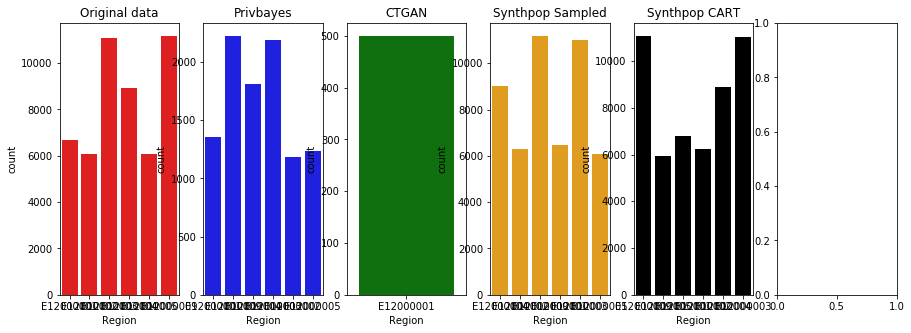

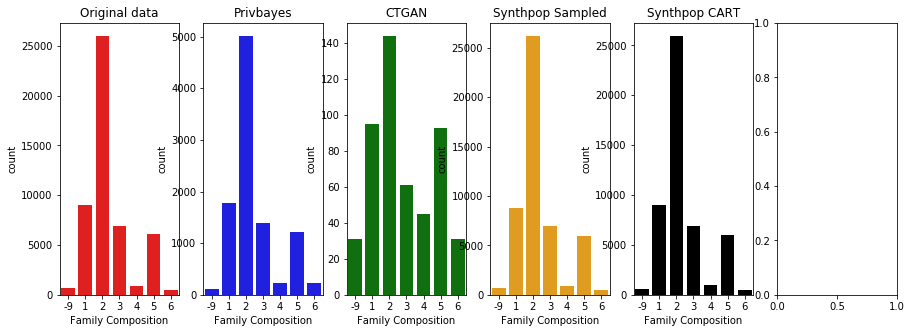

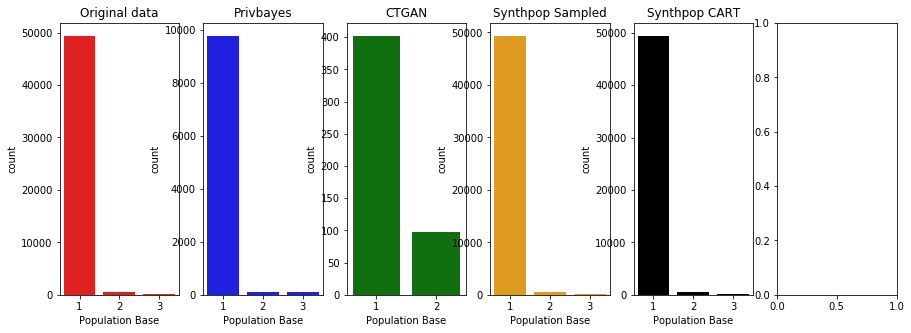

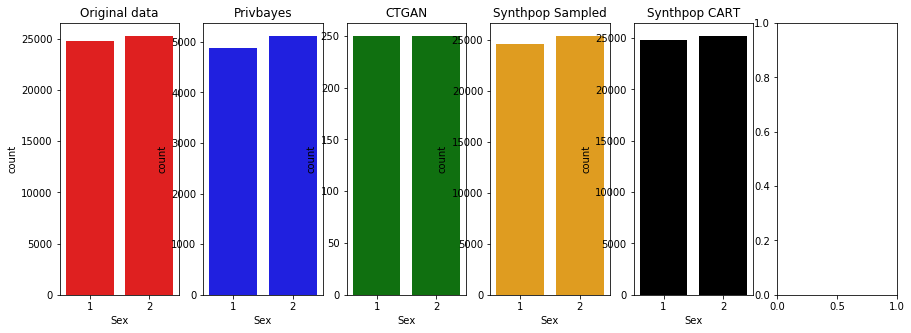

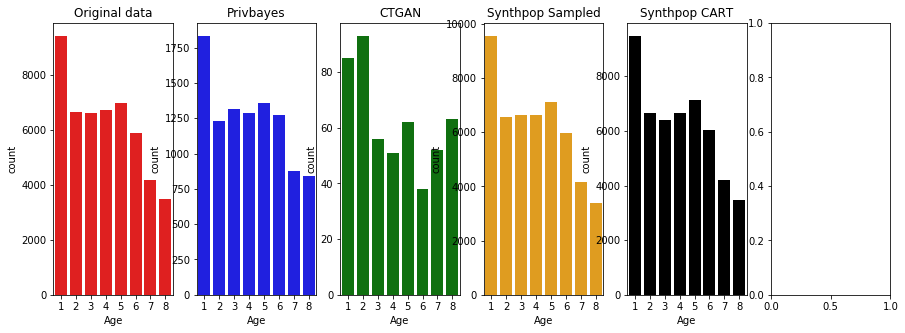

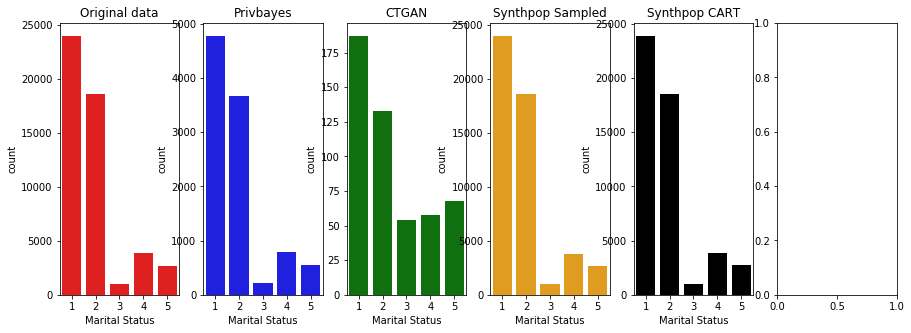

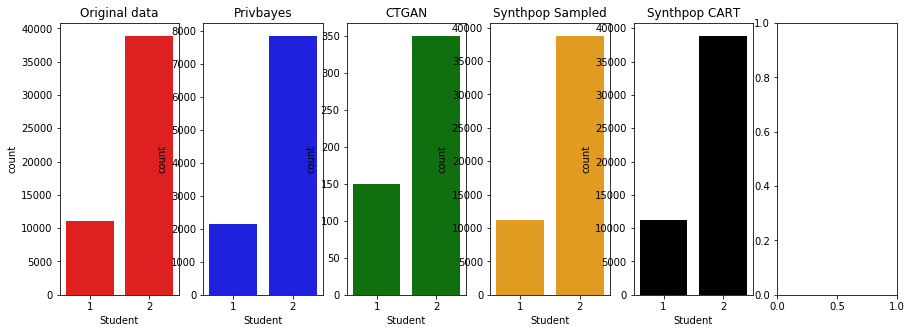

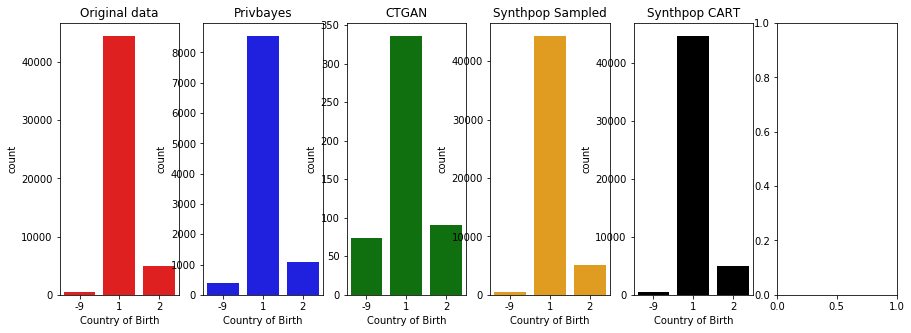

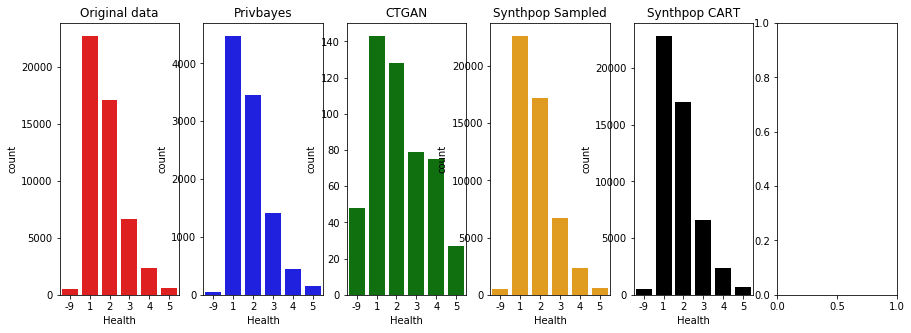

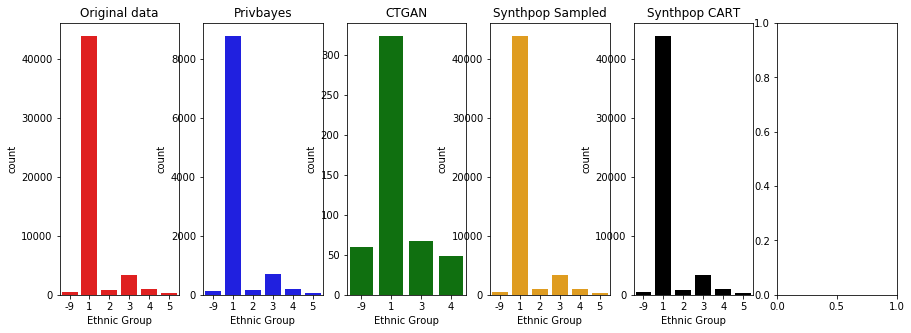

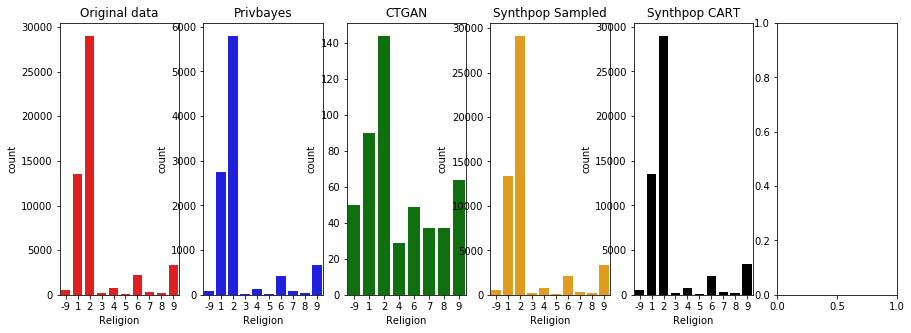

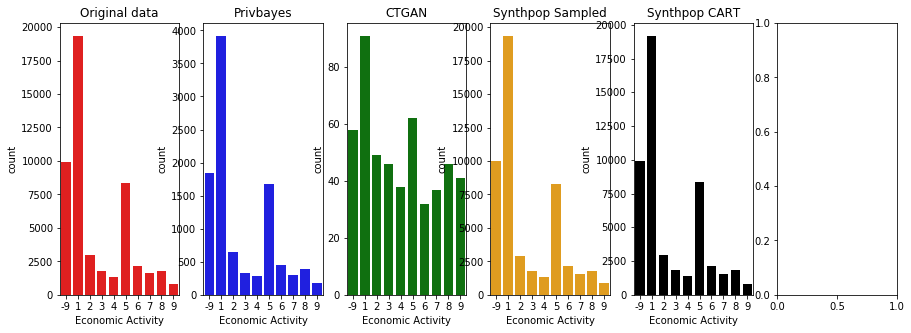

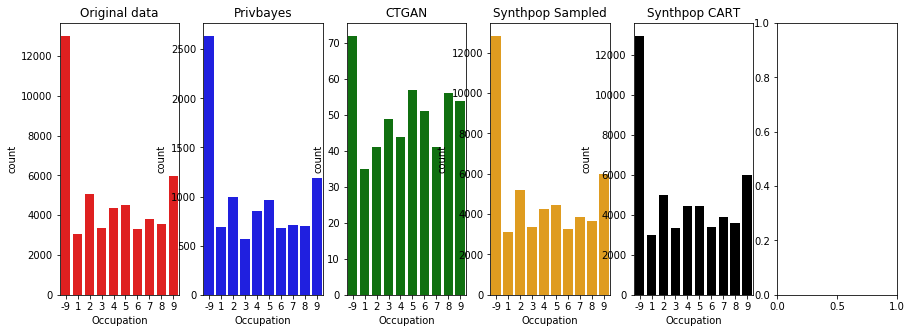

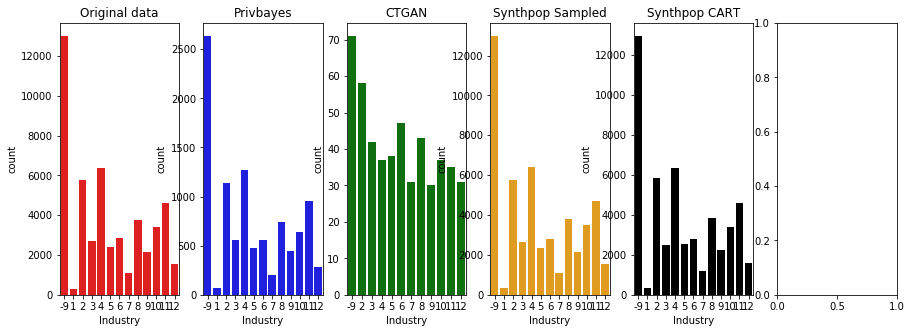

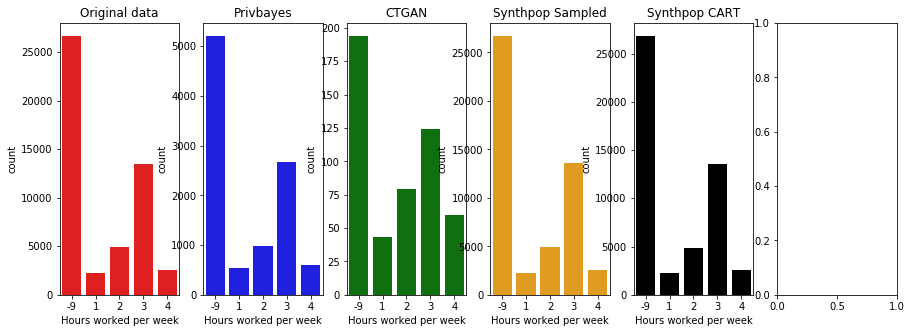

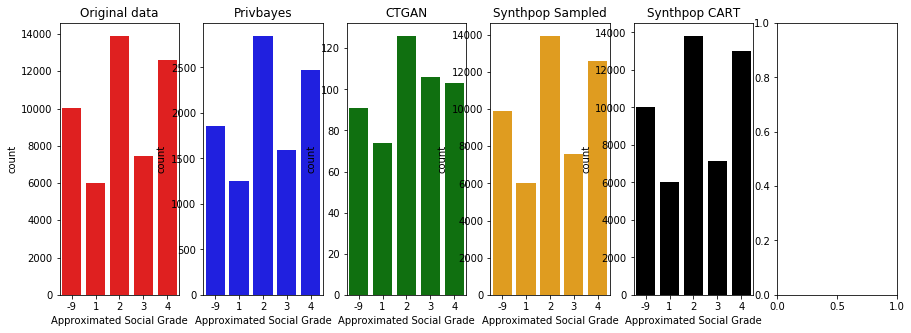

In [5]:
for col in interesting_columns: # normalise y axis if possible
    fig, ax = plt.subplots(1,6, sharey=False)
    sns.countplot(data=census_dataset, x=col, color='red', ax=ax[0])
    ax[0].set_title("Original data")
    sns.countplot(data=privbayes, x=col, color='blue', ax=ax[1])
    ax[1].set_title("Privbayes")
    sns.countplot(data=CTGAN, x=col, color='green', ax=ax[2])
    ax[2].set_title("CTGAN")
    sns.countplot(data=synthpop_sampled, x=col, color='orange', ax=ax[3]) 
    ax[3].set_title("Synthpop Sampled")
    sns.countplot(data=synthpop_cart, x=col, color='black', ax=ax[4])
    ax[4].set_title("Synthpop CART")
#     sns.countplot(data=sgf, x=col, color='brown', ax=ax[5])
#     ax[5].set_title("SGF")
    fig.set_size_inches(15, 5)

# Disclosure risk comparison

In [6]:
risks = {}
with open('../synth-output/2011-census-test-1-privbayes/disclosure_risk.json') as jsonFile:
    risks['Privbayes'] = json.load(jsonFile)
    jsonFile.close()
with open('../synth-output/2011-census-test-2-CTGAN/disclosure_risk.json') as jsonFile:
    risks['CTGAN'] = json.load(jsonFile)
    jsonFile.close()
with open('../synth-output/2011-census-test-3-synthpop/disclosure_risk.json') as jsonFile:
    risks['Synthpop Sampled'] = json.load(jsonFile)
    jsonFile.close()
# with open('../synth-output/2011-census-test-4-sgf/disclosure_risk.json') as jsonFile:
#     risks['SGF'] = json.load(jsonFile)
#     jsonFile.close()
with open('../synth-output/2011-census-test-5-synthpop-cart/disclosure_risk.json') as jsonFile:
    risks['Synthpop CART'] = json.load(jsonFile)
    jsonFile.close()

TODO:
- Add a positive score, one with some rows identical (leaked)
- Maybe a couple, one partial leak
- Use Jade

In [7]:
pd.DataFrame.from_dict(risks).T

,EMRi,TMRi,TMRa,EMRi_norm,TMRi_norm
Privbayes,0.0,0.0,NaN,0.0,0.0
CTGAN,0.0,0.0,0.0,0.0,0.0
Synthpop Sampled,0.0,0.0,0.0,0.0,0.0
Synthpop CART,0.0,0.0,0.0,0.0,0.0


# Utility comparison

In [8]:
def reformat(utility_dict):
    """Convert utility dict to a format easier to visualise in a dataframe"""
    output = {}
    output['Accuracy'] = utility_dict['accuracy']['value']
    output['Precision (Macro)'] = utility_dict['precision']['macro']
    output['Precision (Weighted)'] = utility_dict['precision']['weighted']
    output['Recall (Macro)'] = utility_dict['recall']['macro']
    output['Recall (Weighted)'] = utility_dict['recall']['weighted']
    output['F1 (Macro)'] = utility_dict['f1']['macro']
    output['F1 (Weighted)'] = utility_dict['f1']['weighted']
    return output
    

### Logistic Regression

In [9]:
method = 'LogisticRegression'
log_reg_utility = {}

with open('../synth-output/2011-census-test-1-privbayes/utility_o_o.json') as jsonFile:
    log_reg_utility['Privbayes O-O'] = reformat(json.load(jsonFile)[method])
    jsonFile.close()
with open('../synth-output/2011-census-test-1-privbayes/utility_r_o.json') as jsonFile:
    log_reg_utility['Privbayes R-O'] = reformat(json.load(jsonFile)[method])
    jsonFile.close()
with open('../synth-output/2011-census-test-2-CTGAN/utility_o_o.json') as jsonFile:
    log_reg_utility['CTGAN O-O'] = reformat(json.load(jsonFile)[method])
    jsonFile.close()
with open('../synth-output/2011-census-test-2-CTGAN/utility_r_o.json') as jsonFile:
    log_reg_utility['CTGAN R-O'] = reformat(json.load(jsonFile)[method])
    jsonFile.close()
with open('../synth-output/2011-census-test-3-synthpop/utility_o_o.json') as jsonFile:
    log_reg_utility['Synthpop Sampled O-O'] = reformat(json.load(jsonFile)[method])
    jsonFile.close()
with open('../synth-output/2011-census-test-3-synthpop/utility_r_o.json') as jsonFile:
    log_reg_utility['Synthpop Sampled R-O'] = reformat(json.load(jsonFile)[method])
    jsonFile.close()
# with open('../synth-output/2011-census-test-4-sgf/utility_o_o.json') as jsonFile:
#     log_reg_utility['SGF O-O'] = reformat(json.load(jsonFile)[method])
#     jsonFile.close()
# with open('../synth-output/2011-census-test-4-sgf/utility_r_o.json') as jsonFile:
#     log_reg_utility['SGF R-O'] = reformat(json.load(jsonFile)[method])
#     jsonFile.close()
with open('../synth-output/2011-census-test-5-synthpop-cart/utility_o_o.json') as jsonFile:
    log_reg_utility['Synthpop CART O-O'] = reformat(json.load(jsonFile)[method])
    jsonFile.close()
with open('../synth-output/2011-census-test-5-synthpop-cart/utility_r_o.json') as jsonFile:
    log_reg_utility['Synthpop CART R-O'] = reformat(json.load(jsonFile)[method])
    jsonFile.close()

In [10]:
pd.DataFrame.from_dict(log_reg_utility).T

,Accuracy,Precision (Macro),Precision (Weighted),Recall (Macro),Recall (Weighted),F1 (Macro),F1 (Weighted)
Privbayes O-O,40.066667,18.556594,61.793325,62.643132,40.066667,14.724358,47.096365
Privbayes R-O,33.146667,12.492955,70.003682,77.389527,33.146667,8.795922,44.411007
CTGAN O-O,39.333333,17.574227,51.965969,57.798574,39.333333,15.740741,44.058201
CTGAN R-O,26.000000,10.320513,89.035897,41.901629,26.000000,6.563959,39.154809
Synthpop Sampled O-O,39.620000,18.598990,60.218370,68.802611,39.620000,14.717288,46.552237
Synthpop Sampled R-O,25.453333,7.692308,100.000000,94.265641,25.453333,3.121398,40.578170
Synthpop CART O-O,39.593333,18.616795,59.931222,68.868460,39.593333,14.755343,46.390420
Synthpop CART R-O,39.426667,18.172374,60.944333,74.711634,39.426667,13.978776,46.688676
